# Proyecto Final
Grupo Conformado por:
- Darlyn Bravo Peña
- Joel Gabriel Torrejón
- Brandon Jason Valle Tamayo
- Giovanni Vega

## Dataset
El dataset seleccionado contiene información de accidentes de tránsitos, es decir cada fila representa un accidente de tránsito en la ciudad de Nueva York - USA. Cada fila fue un reporte desde la Policía y cada fila hace mención a un accidente con heridos hasta la muerte, también siginifica que al menos hubo un daño mínimo de UDS 1000

## Análisis Exploratorio

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('files/motor_vehicle_collisions_crashes_nyc.csv', encoding='utf-8', delimiter=',')

/tmp/ipykernel_276/3119577382.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('files/motor_vehicle_collisions_crashes_nyc.csv', encoding='utf-8', delimiter=',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168156 entries, 0 to 2168155
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [4]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           670089
ZIP CODE                          670358
LATITUDE                          239834
LONGITUDE                         239834
LOCATION                          239834
ON STREET NAME                    467424
CROSS STREET NAME                 827260
OFF STREET NAME                  1793106
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7475
CONTRIBUTING FACTOR VEHICLE 2     344214
CONTRIBUTING FACTOR VEHICLE 3    2011713
CONTRIBUTING FACTOR VEHICLE 4    2132507
CONTRIBUTING FACTOR VEHICLE 5    2158411
COLLISION_ID                           0
VEHICLE TYPE COD

In [6]:
columns_contributing = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

df[columns_contributing] = df[columns_contributing].fillna("Unspecified")

In [7]:
cols_numericas = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]

df[cols_numericas] = df[cols_numericas].fillna(0)


In [8]:
columns_contributing = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

df[columns_contributing] = df[columns_contributing].fillna("Unspecified")

In [9]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           670089
ZIP CODE                          670358
LATITUDE                          239834
LONGITUDE                         239834
LOCATION                          239834
ON STREET NAME                    467424
CROSS STREET NAME                 827260
OFF STREET NAME                  1793106
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE COD

In [10]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,4455765,Sedan,Sedan,Unspecified,Unspecified,Unspecified
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,4513547,Sedan,Unspecified,Unspecified,Unspecified,Unspecified
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,4675373,Moped,Sedan,Sedan,Unspecified,Unspecified
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,4541903,Sedan,Pick-up Truck,Unspecified,Unspecified,Unspecified
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,4566131,Station Wagon/Sport Utility Vehicle,Unspecified,Unspecified,Unspecified,Unspecified


## 1. Análisis Exploratorio Avanzado (EDA)
Distribuciones y patrones temporales
Tendencias por fecha y hora: frecuencia de accidentes por mes, día de la semana y hora del día. ¿Hay horas pico?

Estacionalidad: ¿más accidentes en ciertas épocas del año?

Heatmaps temporales: días vs. horas.

In [11]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time


df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
df['DayOfWeek'] = df['CRASH DATE'].dt.day_name()
df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S').dt.hour

<Axes: title={'center': 'Accidentes por mes'}, xlabel='Month'>

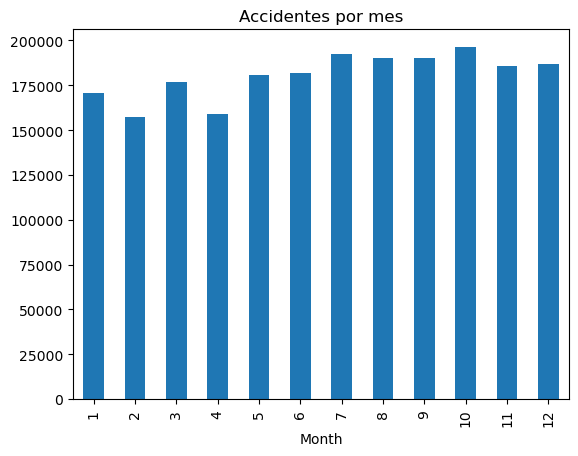

In [12]:
df.groupby('Month').size().plot(kind='bar', title='Accidentes por mes')

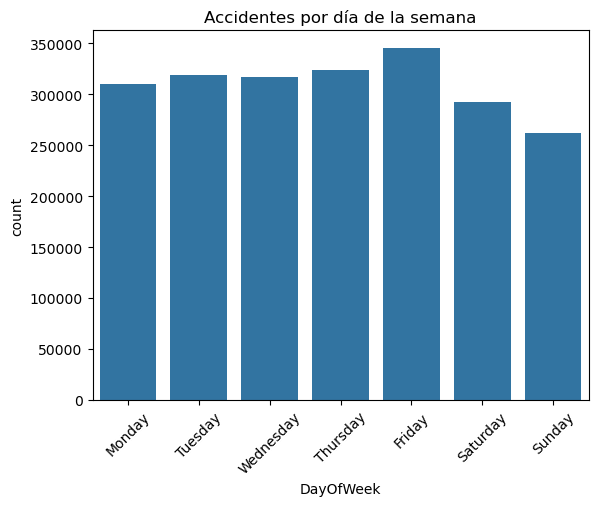

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='DayOfWeek', order=order)
plt.title('Accidentes por día de la semana')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Accidentes por hora del día'}, xlabel='Hour'>

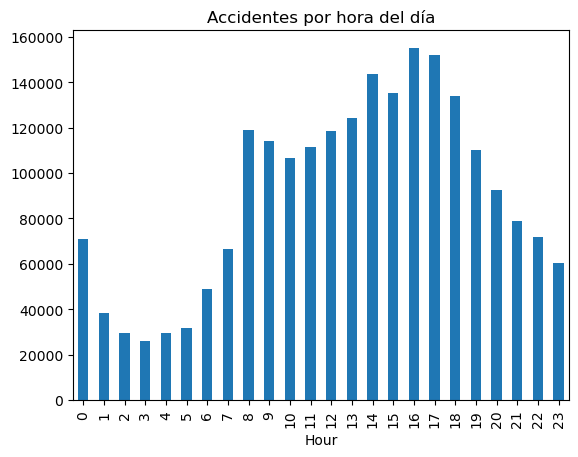

In [14]:
df.groupby('Hour').size().plot(kind='bar', title='Accidentes por hora del día')

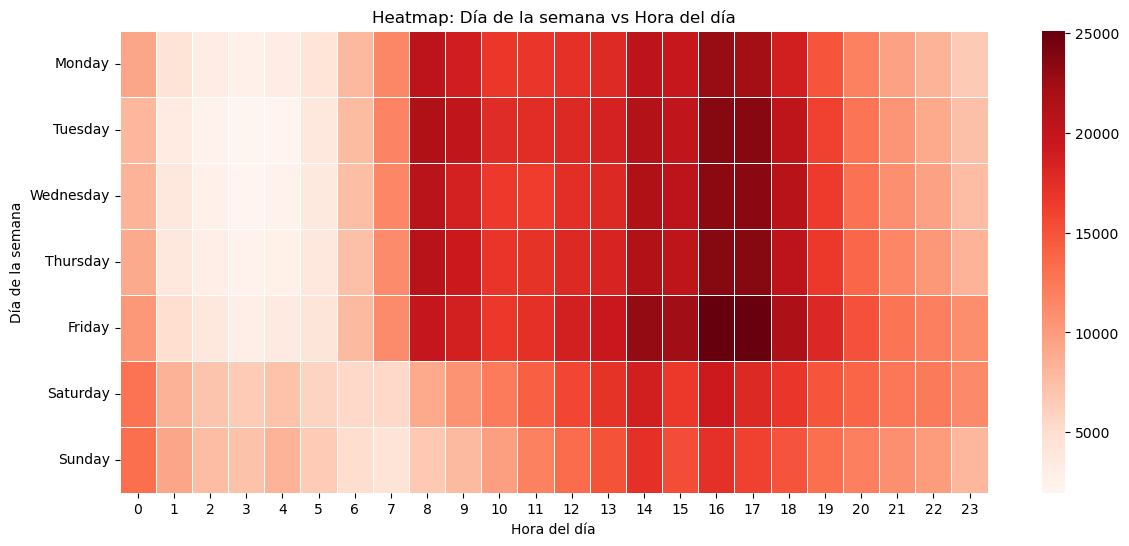

In [15]:
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack().reindex(index=order)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5)
plt.title("Heatmap: Día de la semana vs Hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

## Matriz de Covarianza

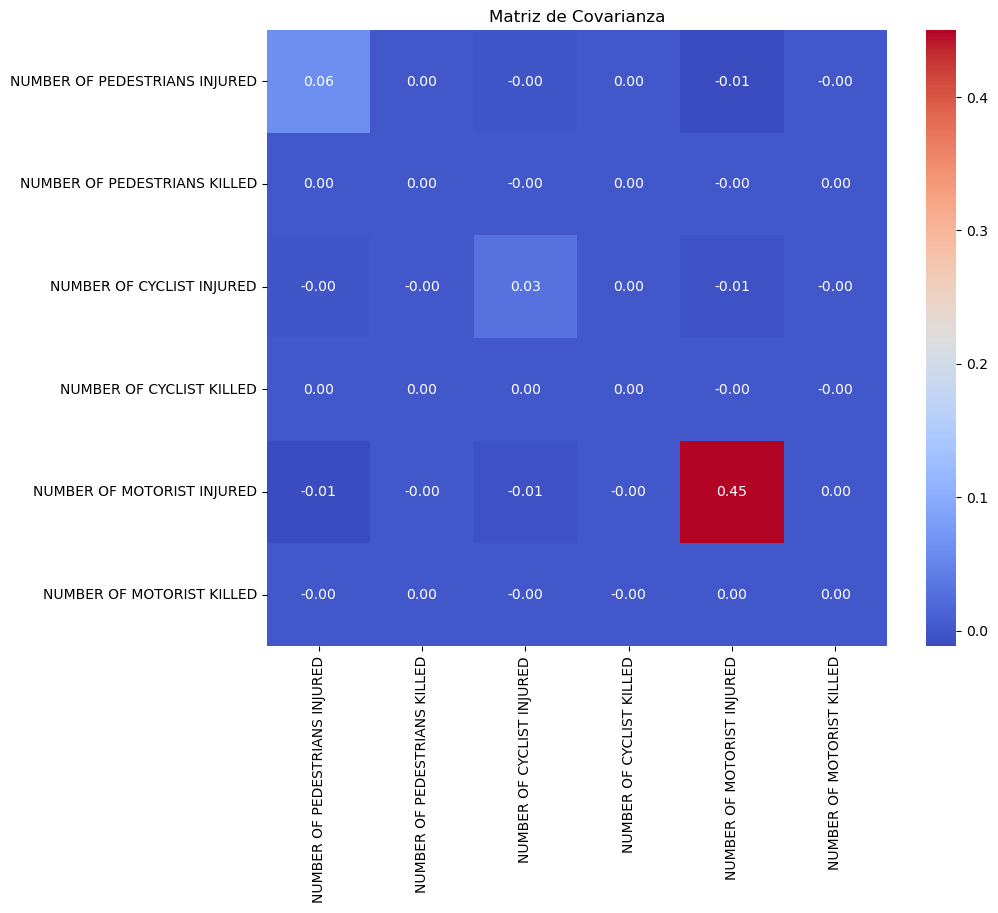

In [16]:
columns = [
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED',
]
cov_matrix = df[columns].cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Covarianza")
plt.show()

## 🧠 Clustering por patrones (HOUR, VICTIMAS, CONTRIBUTING FACTOR):  
Las columnas de víctimas (NUMBER OF ...) no tienen nulos, así que puedes usarlas sin problema.  

HOUR: viene de CRASH TIME que tampoco tiene nulos → ✔️ usable.  

CONTRIBUTING FACTOR VEHICLE X: también sin nulos → ✔️ usable (puedes codificarlos como dummies o categorías).  

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

feature_columns = [
    'Hour',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED',
    'CONTRIBUTING FACTOR VEHICLE 1'
]

features = df[feature_columns].copy()
# Convertir factores contribuyentes en dummies
features = pd.get_dummies(features, columns=['CONTRIBUTING FACTOR VEHICLE 1'], drop_first=True)

In [55]:
features.dtypes

Hour                                                                int32
NUMBER OF PERSONS INJURED                                         float64
NUMBER OF PEDESTRIANS INJURED                                       int64
NUMBER OF CYCLIST INJURED                                           int64
NUMBER OF MOTORIST INJURED                                          int64
                                                                   ...   
CONTRIBUTING FACTOR VEHICLE 1_Unspecified                            bool
CONTRIBUTING FACTOR VEHICLE 1_Using On Board Navigation Device       bool
CONTRIBUTING FACTOR VEHICLE 1_Vehicle Vandalism                      bool
CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited                bool
CONTRIBUTING FACTOR VEHICLE 1_Windshield Inadequate                  bool
Length: 65, dtype: object

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [57]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
df['CLUSTER'] = clusters

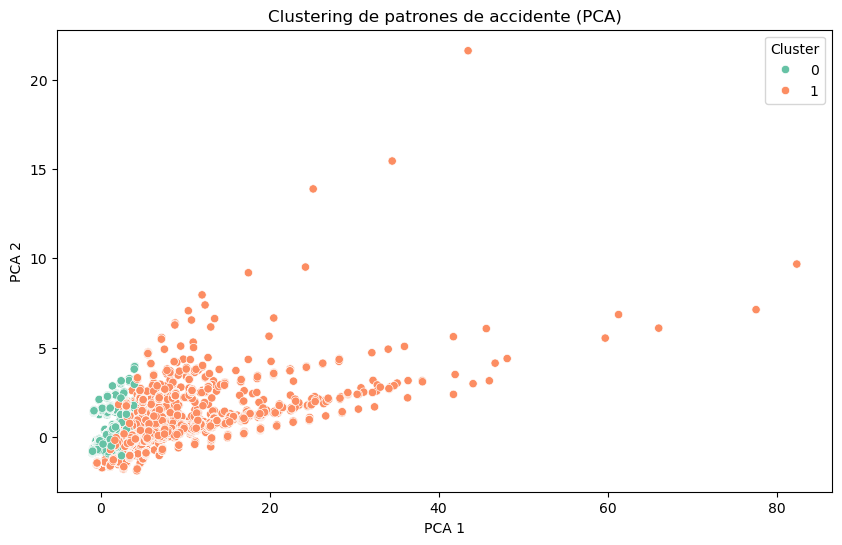

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Clustering de patrones de accidente (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


In [65]:
loadings = pd.DataFrame(
    pca.components_,
    columns=features.columns.to_list(),
    index=['PC1', 'PC2']
)
loadings

,Hour,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1_80,CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective,CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage,CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement,CONTRIBUTING FACTOR VEHICLE 1_Animals Action,...,CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Device Improper/Non-Working,CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded,CONTRIBUTING FACTOR VEHICLE 1_Turning Improperly,CONTRIBUTING FACTOR VEHICLE 1_Unsafe Lane Changing,CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed,CONTRIBUTING FACTOR VEHICLE 1_Unspecified,CONTRIBUTING FACTOR VEHICLE 1_Using On Board Navigation Device,CONTRIBUTING FACTOR VEHICLE 1_Vehicle Vandalism,CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited,CONTRIBUTING FACTOR VEHICLE 1_Windshield Inadequate
PC1,0.01511,0.690795,0.155768,0.102036,0.645288,-0.000631,0.009712,0.019829,0.039317,-0.004528,...,0.012311,0.106659,-0.021364,-0.015706,0.091920,-0.120491,0.001894,-0.001077,0.014762,0.000344
PC2,0.04210,0.089822,0.170651,-0.040456,0.043137,-0.002628,-0.006265,-0.013267,-0.039721,-0.014526,...,-0.005159,-0.032291,-0.077927,-0.070243,-0.027557,0.792012,-0.003340,-0.003522,-0.018713,-0.001757


In [28]:
!pip install mlxtend

In [29]:
from mlxtend.frequent_patterns import apriori, association_rules

# Unir factores y tipos de vehículo
df_rules = df[[
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1',
]].fillna("Unspecified")

# Unir los factores en una lista por fila
df_rules['ITEMS'] = df_rules.values.tolist()


In [30]:
# Expandir listas a transacciones
transactions = df_rules['ITEMS'].tolist()

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [31]:
transactions

[['Aggressive Driving/Road Rage', 'Sedan'],
 ['Pavement Slippery', 'Sedan'],
 ['Unspecified', 'Moped'],
 ['Following Too Closely', 'Sedan'],
 ['Passing Too Closely', 'Station Wagon/Sport Utility Vehicle'],
 ['Unspecified', 'Sedan'],
 ['Following Too Closely', 'Sedan'],
 ['Failure to Yield Right-of-Way', 'Sedan'],
 ['Unspecified', 'Sedan'],
 ['Unspecified', 'Sedan'],
 ['Unspecified', 'Unspecified'],
 ['Unspecified', 'Dump'],
 ['Passing Too Closely', 'Sedan'],
 ['Unspecified', 'Sedan'],
 ['Driver Inexperience', 'Sedan'],
 ['Passing Too Closely', 'Sedan'],
 ['Passing or Lane Usage Improper', 'Station Wagon/Sport Utility Vehicle'],
 ['Turning Improperly', 'Sedan'],
 ['Unsafe Lane Changing', 'Station Wagon/Sport Utility Vehicle'],
 ['Unsafe Speed', 'Sedan'],
 ['Reaction to Uninvolved Vehicle', 'Sedan'],
 ['Passing Too Closely', 'Tanker'],
 ['Steering Failure', 'Sedan'],
 ['Traffic Control Disregarded', 'Station Wagon/Sport Utility Vehicle'],
 ['Unspecified', 'Station Wagon/Sport Utility Veh

In [32]:
# # Obtener conjuntos frecuentes
# frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# # Generar reglas
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# # Ver las más fuertes
# rules.sort_values(by="confidence", ascending=False).head(10)


Interpretación:

En el 2.19% de todos los registros, se indica que la fatiga fue un factor.

Cuando hay fatiga como causa, en más del 51% de los casos, el vehículo implicado es un "PASSENGER VEHICLE".

El lift de 2.67 significa que esta asociación es 2.67 veces más fuerte de lo que se esperaría por azar.

🧠 Conclusión: hay una relación fuerte y no trivial entre conductores fatigados y vehículos tipo sedán o pasajeros.



Cuando el factor fue "seguir demasiado cerca", en el 43% de los casos estuvo involucrado un Sedan.

El lift de 1.52 indica una relación moderada, no tan fuerte como la anterior, pero sí significativa.